In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt



model1 = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)



model2 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=500,
    classifier_activation="softmax",
)

In [ ]:
print(model1.summary())



In [36]:
for l1, l2 in zip(model1.layers, model2.layers):
    conf1 = l1.get_config()
    conf2 = l2.get_config()

    if ('batch_input_shape' in conf1) or ('units' in conf1):
        print(conf1 == conf2)
        print(conf1['name'])


False
input_8
True
fc1
True
fc2
False
predictions


In [26]:
print(conf1)

{'name': 'predictions', 'trainable': True, 'dtype': 'float32', 'units': 1000, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


input_8 0
block1_conv1 2 (3, 3, 3, 64)


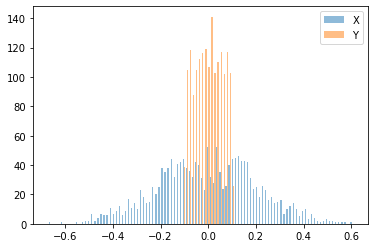

block1_conv2 2 (3, 3, 64, 64)


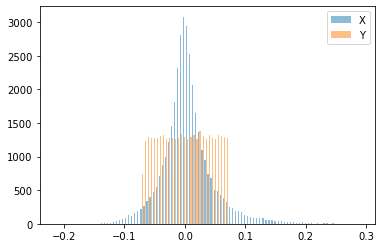

block1_pool 0
block2_conv1 2 (3, 3, 64, 128)


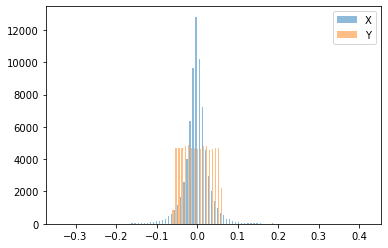

block2_conv2 2 (3, 3, 128, 128)


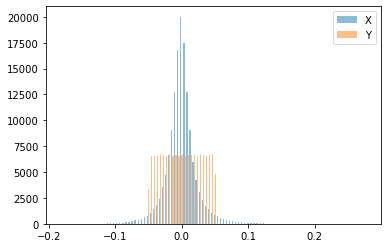

block2_pool 0
block3_conv1 2 (3, 3, 128, 256)


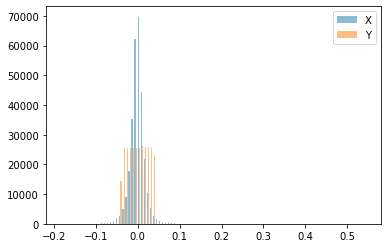

block3_conv2 2 (3, 3, 256, 256)


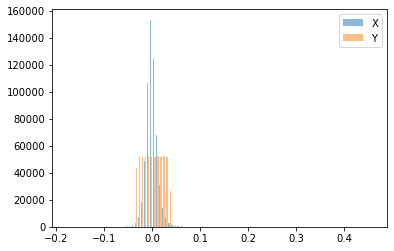

block3_conv3 2 (3, 3, 256, 256)


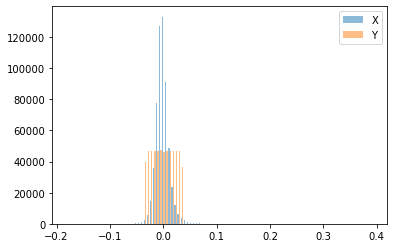

block3_pool 0
block4_conv1 2 (3, 3, 256, 512)


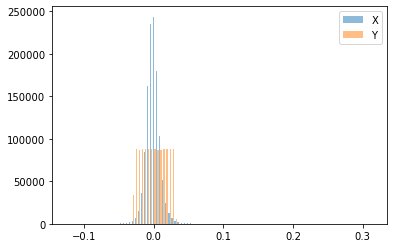

block4_conv2 2 (3, 3, 512, 512)


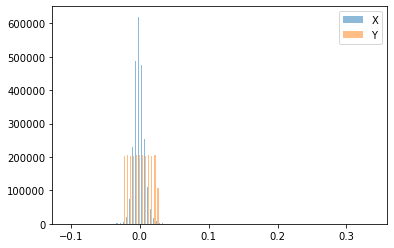

block4_conv3 2 (3, 3, 512, 512)


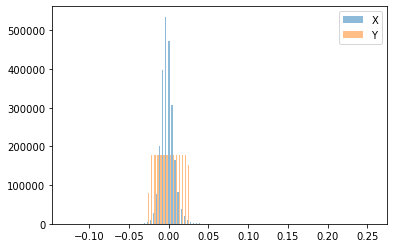

block4_pool 0
block5_conv1 2 (3, 3, 512, 512)


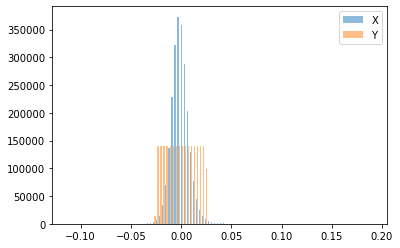

block5_conv2 2 (3, 3, 512, 512)


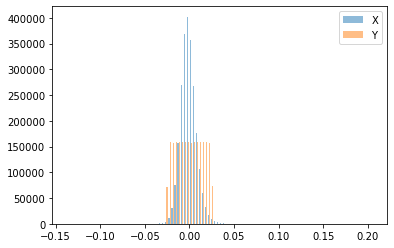

block5_conv3 2 (3, 3, 512, 512)


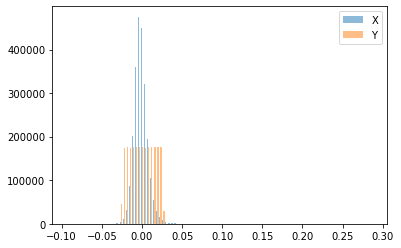

block5_pool 0
flatten 0
fc1 2 (25088, 4096)


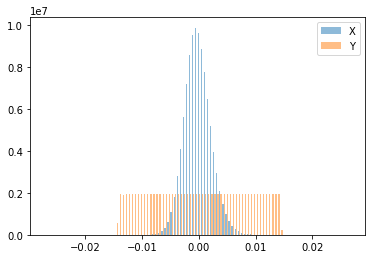

fc2 2 (4096, 4096)


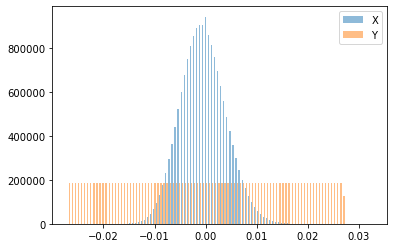

predictions 2 (4096, 1000)


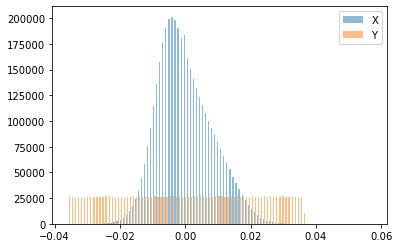

In [59]:
def get_weights_print_stats(layer):
    W = layer.get_weights()
    if len(W) > 0:
        print(len(W))
        print(W[0].shape)
    return W

def hist_weights(weights, bins=100, label='default'):
    for weight in weights:
        
        plt.hist(np.ndarray.flatten(weight), bins=bins, label=label)

'''
for l1, l2 in zip(model1.layers, model2.layers):
    print(l1.get_config()['name'])
    W = get_weights_print_stats(l1)
    hist_weights(W, label='Model 1')
    W = get_weights_print_stats(l2)
    hist_weights(W, label='Model 2')
    plt.show()
'''
for l1, l2 in zip(model1.layers, model2.layers):
    w1 = l1.get_weights()
    w2 = l2.get_weights()
    if len(w1) > 0:
        # Layers available
        print(l1.get_config()['name'],len(w1), w1[0].shape)
        plt.hist(
            [ np.ndarray.flatten(w1[0]),
            np.ndarray.flatten(w2[0])],
            alpha=0.5, bins=100, label=['X','Y'])
        plt.legend(loc='upper right')

        plt.show()

    else:
        print(l1.get_config()['name'],len(w1))
    